# Python Data Visualization

In [2]:
#import the last data set
ords_prods_transform = pd.read_pickle(r'/Users/jonahsnewmacbook/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_transform.pkl')

In [12]:
#creating path
path=r'/Users/jonahsnewmacbook/Instacart Basket Analysis'

### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

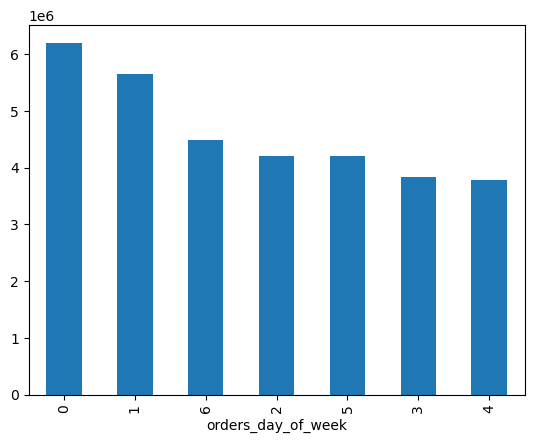

In [4]:
ords_prods_transform['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

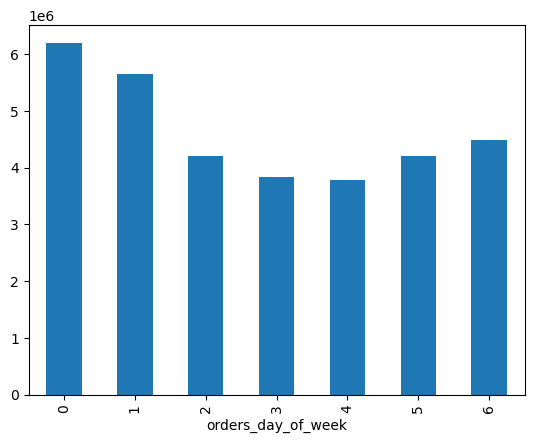

In [5]:
#putting the orders_day_of_week in numerical order
ords_prods_transform['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# sort_index() can be used for printing as well
ords_prods_transform['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

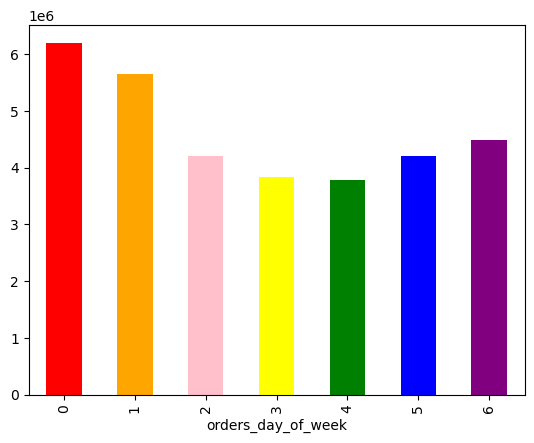

In [10]:
#colors can be added to the bar charts
ords_prods_transform['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'pink', 'yellow', 'green', 'blue', 'purple'])

#### Exporting Charts

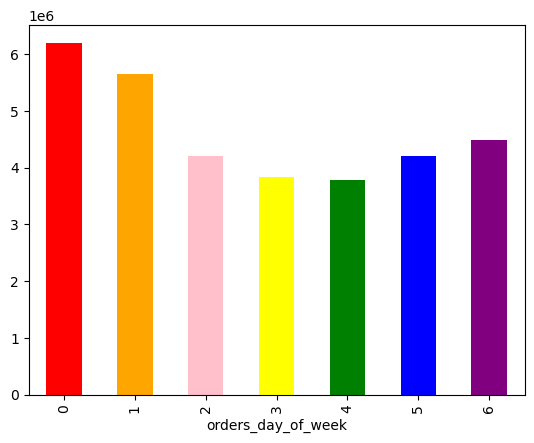

In [11]:
bar = ords_prods_transform['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'pink', 'yellow', 'green', 'blue', 'purple'])

In [14]:
# call the bar chart by calling it bar.figure
# the bar chart can now be exported as an image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

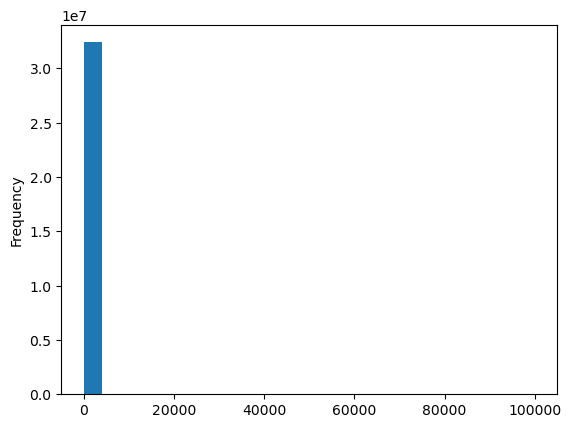

In [15]:
#creating a histogram of the "prices' column
ords_prods_transform['prices'].plot.hist(bins=25)

In [16]:
#there's an outlier within the data and that's why there's only one column


<Axes: xlabel='prices', ylabel='prices'>

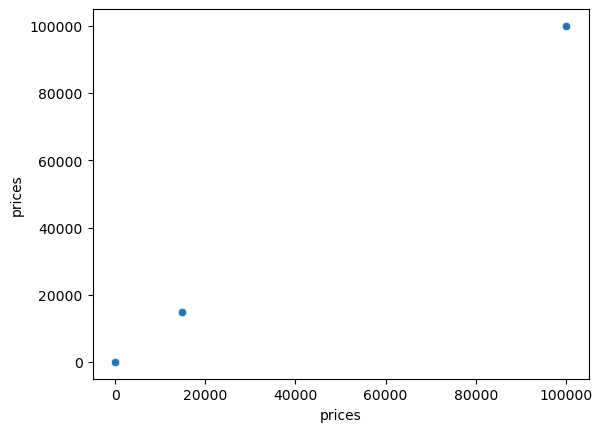

In [17]:
# Lets us move on to creating Scatterplots
sns.scatterplot(x='prices', y='prices', data=ords_prods_transform)

In [18]:
#let's explore the point near 200,000 and the max value point in the scatterplot
ords_prods_transform.loc[ords_prods_transform['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_timestamp,...,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_spent,spender_habit,spender_habit2,frequency_median,frequency_buyer
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,Regularly busy,Regularly days,Most Orders,40,Regular customer,31942.6,108.648299,high spender,5.0,Frequent_customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,Regularly busy,Regularly days,Most Orders,40,Regular customer,31942.6,108.648299,high spender,5.0,Frequent_customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,Regularly busy,Regularly days,Average Orders,4,New customer,30024.6,1154.792308,high spender,11.5,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,Busiest day,Busiest days,Average Orders,4,New customer,30024.6,1154.792308,high spender,11.5,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,Regularly busy,Busiest days,Average Orders,16,Regular customer,15905.3,114.426619,high spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,Busiest day,Busiest days,Average Orders,39,Regular customer,201427.4,1106.743956,high spender,4.0,Frequent_customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,Busiest day,Busiest days,Most Orders,39,Regular customer,201427.4,1106.743956,high spender,4.0,Frequent_customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,Regularly busy,Slowest days,Most Orders,15,Regular customer,101960.7,451.153540,high spender,4.0,Frequent_customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,Regularly busy,Slowest days,Average Orders,12,Regular customer,201503.3,1178.381871,high spender,7.0,Frequent_customer


In [19]:
#from this we see that there are items with the prices of 14900 and 99999. These two values are skewing the charts.
#for now, mark these as missing since they don't make sense in terms of the other values in the column. 
#Turn these into NaNs
ords_prods_transform.loc[ords_prods_transform['prices'] >100, 'prices'] = np.nan

In [21]:
#checking if the replacement was successful; run a max-value check
ords_prods_transform['prices'].max()

25.0

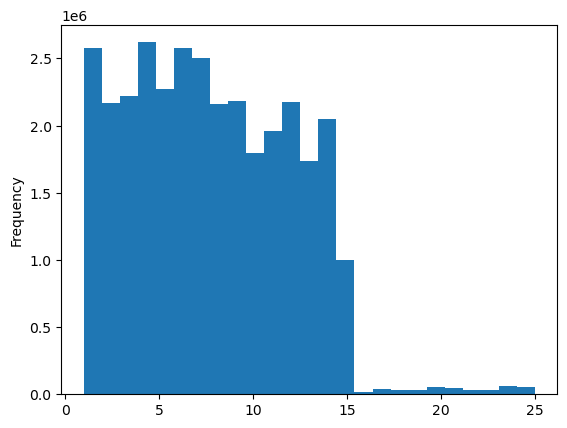

In [22]:
# now that the data has be cleaned, try to create a histogram one more time
hist = ords_prods_transform['prices'].plot.hist(bins=25)

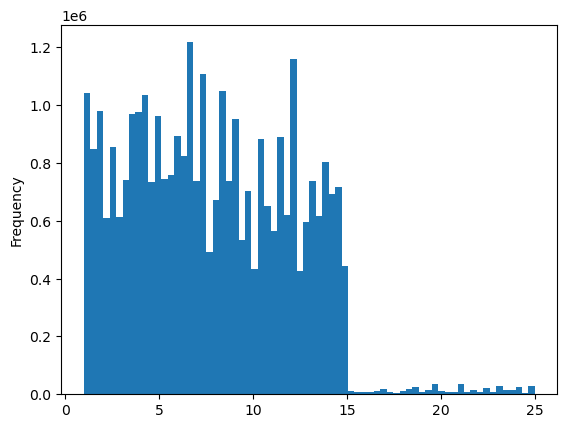

In [24]:
hist2 = ords_prods_transform['prices'].plot.hist(bins=70)

In [25]:
#exporting the histogram visual
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

In [26]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram70.png'))

### Creating Line Charts

In [27]:
#plotting the x='orders_day_of_week' and y='prices'
#Will have to do SAMPLING due to memory limitation and avoid crashing
#Sampling is great because it will randomly choose data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_transform)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
#splitting the dataframe into two samples: big and small
#first, create a list holding True/False values to the test np.random.rant() <=0.7
dev=np.random.rand(len(ords_prods_transform)) <= 0.7

In [30]:
#store 70% of the sample in the dataframe 'big'
big = ords_prods_transform[dev]

In [31]:
#store 30% of the sample in the dataframe 'small'
small = ords_prods_transform[~dev]

In [32]:
#check if the the 'big' and 'small' dataframe completes the whole data set
len(ords_prods_transform)

32404859

In [33]:
len(big)+len(small)

32404859

In [34]:
#reduce the samples to only the columsn that is needed for the chart; 'prices' and 'orders_day_of_week'
df_2 = small[['orders_day_of_week', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


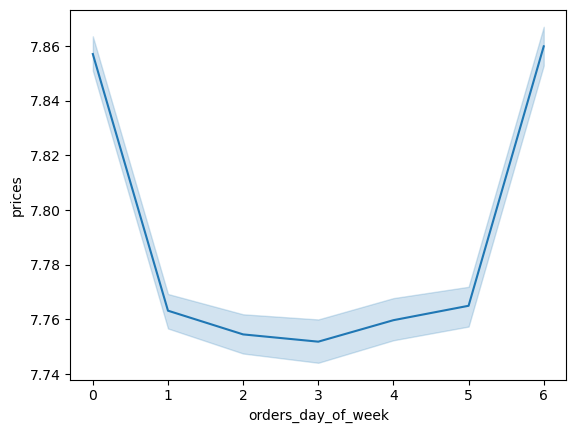

In [35]:
#FINALLY, lets create the line chart
line = sns.lineplot(data = df_2, x='orders_day_of_week', y='prices')

In [36]:
#exporting the line graph visual
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_orders_linesample.png'))

In [37]:
#exporting the new cleaned data
ords_prods_transform.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_transform2.pkl'))